In [2]:
import LinearAlgebra: diagm

In [3]:
import LinearAlgebra: I
eye(n::Integer) = diagm(ones(n))
eye(3)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [4]:
mean_squared_loss(y::Vector, ŷ::Vector) = sum(0.5(y - ŷ).^2)
fullyconnected(w::Vector, n::Number, m::Number, v::Vector, activation::Function) = activation.(reshape(w, n, m) * v)
σ(x) = one(x) / (one(x) + exp(-x))
linear(x) = x

Wh  = randn(10,2)
Wo  = randn(1,10)
dWh = similar(Wh)
dWo = similar(Wo)

function ∇W(x, x̂, ŷ, y, Wo)
    Eŷ  = ŷ - y
    ŷȳ  = ŷ  |> length |> eye
    ȳWo = x̂  |> transpose
    x̄Wh = x  |> transpose
    ȳx̂  = Wo |> transpose
    x̂x̄  = x̂  .* (1.0 .- x̂) |> diagonal
    
    Eȳ  = ŷȳ * Eŷ
    Ex̂  = ȳx̂ * Eȳ
    Ex̄  = x̂x̄ * Ex̂
    EWo = Eȳ * ȳWo
    EWh = Ex̄ * x̄Wh
    return EWo, EWh
end

function net(x, wh, wo, y)
    x̂ = fullyconnected(wh, 10, 2, x, σ)
    ŷ = fullyconnected(wo, 1, 10, x̂, linear)
    
    EWo, EWh = ∇W(x, x̂, ŷ, y, Wo)
    dWo .= EWo
    dWh .= EWh
    
    E = mean_squared_loss(y, ŷ)
end

net (generic function with 1 method)

In [6]:
x = [1.98;4.434]
y = [0.064]
E = Float64[]
Ei = net(x, Wh[:], Wo[:], y)

0.8383500916926003

In [21]:
push!(E, Ei)
Wh -= 0.1dWh
Wo -= 0.1dWo
Ei  = net(x, Wh[:], Wo[:], y)

1.642613288516512e-5

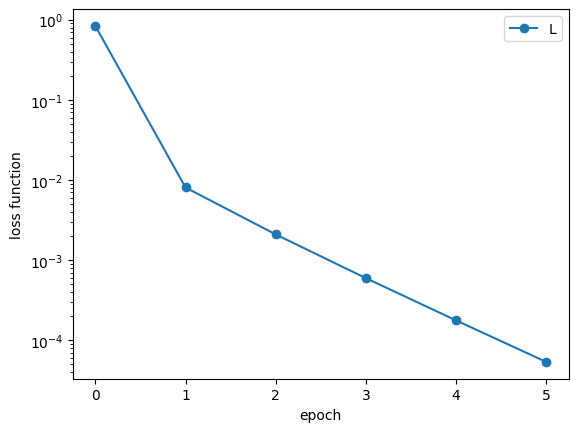

PyObject Text(24.000000000000007, 0.5, 'loss function')

In [23]:
using PyPlot
semilogy(E, "-o")
legend(("Loss function"))
xlabel("epoch")
ylabel("loss function")